In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
import matplotlib.pyplot as plt
import os, os.path

tnp.experimental_enable_numpy_behavior()

In [15]:
img_height = 200,
img_width = 200,
test_dir = r'./data/test/'
train_dir = r'./data/train/'
class_names=["cats", "dogs"]
seed=1234
batch_size=32

train_x = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    validation_split=0.2,
    batch_size=batch_size,
    image_size=(200,200),
    subset="training",
    seed=seed,
)

cv_x = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    validation_split=0.2,
    batch_size=batch_size,
    image_size=(200,200),
    subset="validation",
    seed=seed,
)

test_x = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    batch_size=batch_size,
    image_size=(200,200),
    shuffle=False,
    seed=seed,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 2000 files belonging to 2 classes.


In [11]:
img_height = 200,
img_width = 200,
test_dir = r'./data/test/'
train_dir = r'./data/train/'
class_names=["cats", "dogs"]
seed=1234
batch_size = 32


train_x = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    validation_split=0.2,
    subset="training",
    class_names=class_names,
    seed=seed,
)

cv_x = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    validation_split=0.2,
    subset="validation",
    class_names=class_names,
    seed=seed,
)

test_x = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    image_size=(200,200),
    class_names=class_names,
    seed=seed,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_x = train_x.cache().prefetch(buffer_size=AUTOTUNE)
cv_x = cv_x.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=200,width=200),
    tf.keras.layers.Rescaling(1.0/255.0),
    # tf.keras.layers.RandomContrast(0.2, seed=1234),
    # tf.keras.layers.RandomBrightness(0.2, seed=1234),
    tf.keras.layers.RandomRotation(0.2, seed=1234),
    tf.keras.layers.RandomFlip(seed=1234),
    tf.keras.layers.RandomZoom(0.2, seed=1234),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
  train_x,
  validation_data=cv_x,
  epochs=25,
  callbacks=[
      tf.keras.callbacks.EarlyStopping(
                                      patience=10,
                                      verbose=1,
                                      restore_best_weights=True
                                      ), 
      tf.keras.callbacks.ReduceLROnPlateau(
                                          monitor='val_accuracy', 
                                          patience=2, 
                                          verbose=1, 
                                          factor=0.5, 
                                          min_lr=0.00001
                                          )
]
)


Epoch 1/25
625/625 [==============================] - 97s 155ms/step - loss: 0.4067 - accuracy: 0.8151 - val_loss: 0.4750 - val_accuracy: 0.7986 - lr: 6.2500e-05
Epoch 2/25
625/625 [==============================] - 129s 206ms/step - loss: 0.4073 - accuracy: 0.8131 - val_loss: 0.5050 - val_accuracy: 0.7890 - lr: 6.2500e-05
Epoch 3/25
625/625 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8139
Epoch 3: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
625/625 [==============================] - 127s 204ms/step - loss: 0.4052 - accuracy: 0.8139 - val_loss: 0.4799 - val_accuracy: 0.7972 - lr: 6.2500e-05
Epoch 4/25
625/625 [==============================] - 105s 167ms/step - loss: 0.4041 - accuracy: 0.8160 - val_loss: 0.4985 - val_accuracy: 0.7886 - lr: 3.1250e-05
Epoch 5/25
625/625 [==============================] - ETA: 0s - loss: 0.3984 - accuracy: 0.8202
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
625/625 [======

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 200, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 200, 200, 3)      0         
 tation)                                                         
                                                                 
 random_flip_1 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 200, 200, 3)      12        
 hNormalization)                                      

In [4]:
model = tf.keras.models.load_model('cat_dog.model')

2022-08-07 12:57:41.506893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 12:57:41.546518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 12:57:41.546698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-07 12:57:41.547432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [22]:
model.evaluate(test_x)

63/63 [==============================] - 2s 27ms/step - loss: 0.4410 - accuracy: 0.8075


[0.44097664952278137, 0.8075000047683716]

1/1 [==============================] - 0s 22ms/step


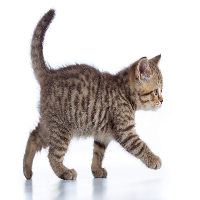

Prediction: 99.98573064804077% cat


In [26]:
kitten = load_img('kitten.jpg', target_size=(200, 200))
kitten = img_to_array(kitten)
prediction = model.predict(kitten.reshape(1, 200, 200, 3))
classes = ['cat', 'dog']
display(array_to_img(kitten))
print(f'Prediction: {prediction.max()*100}% {classes[prediction.argmax()]}')